# This notebook examplifies reading land surface model output netcdf files, plotting and saving as tif 
load Python packages and set path to data

In [25]:
import xarray as xr
import glob
import pandas as pd
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
#data = xr.open_dataset('LIS_HIST_nn_200909.nc', engine = 'netcdf4') 
#print(data)
#lon = data.lon.values[0]
path = '/Users/carina/Desktop/data/seup/TUM/SEUP/'

#fileList = glob.glob(path + '*.nc')
#fileList.sort()

In [21]:
#upload data and explore the file 

dat = xr.open_dataset(path + 'LIS_HIST_SWE_20160201-201602dd.nc', engine = 'netcdf4') 
#a = dat.SnowT_tavg.to_dataframe()
#a
#b = a.groupby("SnowT_tavg")
#a.north_south.plot()
#b.plot()

dat



<xarray.Dataset>
Dimensions:   (east_west: 2336, north_south: 941, time: 29)
Coordinates:
  * time      (time) datetime64[ns] 2016-02-01T12:00:00 2016-02-02T12:00:00 ...
Dimensions without coordinates: east_west, north_south
Data variables:
    SWE_tavg  (time, north_south, east_west) float32 ...
Attributes:
    missing_value:           -9999.0
    NUM_SOIL_LAYERS:         4
    SOIL_LAYER_THICKNESSES:  [ 10.  25.  65. 200.]
    title:                   LIS land surface model output
    institution:             NASA GSFC
    source:                  +template glacier
    references:              Kumar_etal_EMS_2006, Peters-Lidard_etal_ISSE_2007
    conventions:             CF-1.6
    comment:                 website: http://lis.gsfc.nasa.gov/
    MAP_PROJECTION:          EQUIDISTANT CYLINDRICAL
    SOUTH_WEST_CORNER_LAT:   24.875
    SOUTH_WEST_CORNER_LON:   -168.625
    DX:                      0.05
    DY:                      0.05
    history:                 Fri Nov 30 15:29:42 EST

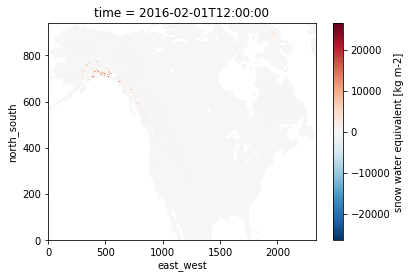

In [22]:
%matplotlib inline 
DataArray = dat.SWE_tavg.sel(time = '2016-02-01T12:00:00')
DataArray.plot()


In [24]:
test = dat.SWE_tavg.mean
test

<bound method ImplementsArrayReduce._reduce_method.<locals>.wrapped_func of <xarray.DataArray 'SWE_tavg' (time: 29, north_south: 941, east_west: 2336)>
[63747104 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2016-02-01T12:00:00 2016-02-02T12:00:00 ...
Dimensions without coordinates: north_south, east_west
Attributes:
    units:          kg m-2
    standard_name:  liquid_water_content_of_surface_snow
    long_name:      snow water equivalent
    vmin:           0.0
    vmax:           0.0>

In [22]:
#dat.SWE_tavg[:,988,261].plot() 


In [26]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (8,5)

In [27]:
da = xr.DataArray([9, 0, 2, 1, 0])
da

<xarray.DataArray (dim_0: 5)>
array([9, 0, 2, 1, 0])
Dimensions without coordinates: dim_0

In [28]:
da = xr.DataArray([9, 0, 2, 1, 0], dims=['x'])
da

<xarray.DataArray (x: 5)>
array([9, 0, 2, 1, 0])
Dimensions without coordinates: x

In [29]:

path1 = '/Users/carina/Desktop/data/seup/DAN/'
dat1 = xr.open_dataset(path1 + 'CLSMF2.5_ECMWF_SWE201404071200.d01.nc', engine = 'netcdf4') 
#a = dat.SnowT_tavg.to_dataframe()
#a
#b = a.groupby("SnowT_tavg")
#a.north_south.plot()
#b.plot()
dat1

<xarray.Dataset>
Dimensions:   (east_west: 15, north_south: 11, time: 1)
Coordinates:
  * time      (time) datetime64[ns] 2014-04-07T12:00:00
Dimensions without coordinates: east_west, north_south
Data variables:
    SWE_tavg  (north_south, east_west) float32 ...
    lat       (north_south, east_west) float32 ...
    lon       (north_south, east_west) float32 ...
Attributes:
    missing_value:           -9999.0
    NUM_SOIL_LAYERS:         3
    SOIL_LAYER_THICKNESSES:  [  2. 100. 200.]
    title:                   LIS land surface model output
    institution:             NASA GSFC
    source:                  +template glacier
    history:                 Mon Jun 17 21:52:00 2019: ncks -v time,lat,lon,S...
    references:              Kumar_etal_EMS_2006, Peters-Lidard_etal_ISSE_2007
    conventions:             CF-1.6
    comment:                 website: http://lis.gsfc.nasa.gov/
    MAP_PROJECTION:          EQUIDISTANT CYLINDRICAL
    SOUTH_WEST_CORNER_LAT:   24.875
    SOUTH_WEST

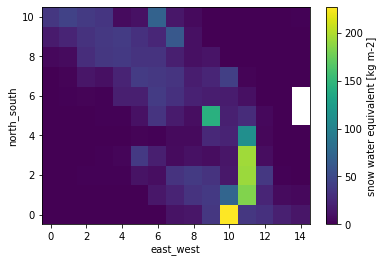

In [30]:
#%matplotlib widget
%matplotlib inline
DataArray1 = dat1.SWE_tavg
DataArray1.plot()

In [11]:
#print(DataArray1)


In [31]:
CLSMF25_ECMWF_SWE201404071200 = dat1.SWE_tavg.values
#CLSMF25_ECMWF_SWE201404071200.to_csv
pd.DataFrame(CLSMF25_ECMWF_SWE201404071200).to_csv('CLSMF25_ECMWF_SWE201404071200.csv')
#CLSMF25_ECMWF_SWE201404071200.savetxt('test.txt')

In [32]:
lat = dat1.lat.values
lon = dat1.lon.values
pd.DataFrame(lat).to_csv('lat_seup_tum.csv')
pd.DataFrame(lon).to_csv('long_seup_tum.csv')

In [16]:
from osgeo import gdal

#gdal_translate -of GTiff NoahMP_GDAS_SWE201404071200.d01.nc test.tiff

gdal_translate -r cubic -of VRT -co COMPRESS=deflate -unscale -a_nodata -32767.0 -a_srs EPSG:4326  netcdf4:"NoahMP_GDAS_SWE201404071200.d01.nc"://Users/carina/Desktop/data/seup/DAN  NoahMP_GDAS_SWE201404071200.d01.vrt

gdalwarp -of GTIFF -tps  NoahMP_GDAS_SWE201404071200.d01.vrt  NoahMP_GDAS_SWE201404071200.d01.nc.tif


SyntaxError: invalid syntax (<ipython-input-16-aa2dffea71ca>, line 5)

In [15]:
gdal_translate NoahMP_GDAS_SWE201404071200.d01.nc NoahMP_GDAS_SWE201404071200.d01_1.nc \
    -of NetCDF -a_nodata -3276.8 -ot Float32 -b 244 -unscale -a_srs epsg:4326

SyntaxError: invalid syntax (<ipython-input-15-f8e4916ad685>, line 1)